In [7]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [8]:
# Read data 

df = pd.read_csv(r'C:\Users\User\Documents\Singapore Institute of Management - Bachelor\CSCI316 - Big Data Mining Techniques and Implementation\Group Assignment\Group Assignment 1/data.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_10768\2932465388.py:3: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\User\Documents\Singapore Institute of Management - Bachelor\CSCI316 - Big Data Mining Techniques and Implementation\Group Assignment\Group Assignment 1/data.csv')


In [9]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Data discovery

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [11]:
# Check the null value in each attributes

df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

# Data pre-processing

In [12]:
# total_rev_hi_lim 

# Fill missing values in total_rev_hi_lim with Simple Imputer

imputer = SimpleImputer(strategy='median')
total_rev_hi_lim = df['total_rev_hi_lim'].values.reshape(-1,1)
total_rev_hi_lim_imputed = imputer.fit_transform(total_rev_hi_lim)
df['total_rev_hi_lim'] = total_rev_hi_lim_imputed

In [13]:
# home_ownership 

# Remove rows with value ANY

df = df[df['home_ownership'] != 'ANY']
df['home_ownership'].unique()

# Level encoding for home ownership 

home_type = ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(home_type)

# Encode the 'grade' column in the DataFrame
df['home_ownership'] = encoder.transform(df['home_ownership'])


In [14]:
# Purpose 

# Label encoding for purpose

df['purpose'].unique()

purposes = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(purposes)
# Encode the 'grade' column in the DataFrame
df['purpose'] = encoder.transform(df['purpose'])


In [15]:
# sub_grade

# Sort the order of subgrades and do label encoding

subgrades = ['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5']

def custom_sort_key(subgrade):
    match = re.match(r'([A-Za-z]+)(\d+)', subgrade)
    letter = match.group(1)
    number = int(match.group(2))
    
    return letter, number

sorted_subgrades = sorted(subgrades, key=custom_sort_key)

# Level encoding for sorted sub-grade 

encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(sorted_subgrades)

# Encode the 'grade' column in the DataFrame
df['sub_grade'] = encoder.transform(df['sub_grade'])

In [16]:
# employment_lengths

employment_lengths = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'nan']

label_encoder = LabelEncoder()

# Fit the LabelEncoder with unique values
label_encoder.fit(employment_lengths)

# Encode the attribute values
df['emp_length'] = label_encoder.transform(df['emp_length'])

In [17]:
# mths_since_last_delinq

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(-1)

In [18]:
# mths_since_last_record

df['mths_since_last_record'] = df['mths_since_last_record'].fillna(-1)

In [19]:
# revol_util
# Handle missing value with imputer

imputer = SimpleImputer(strategy='mean')

revol_util = df['revol_util'].values.reshape(-1,1)

revol_util_imputed = imputer.fit_transform(revol_util)

df['revol_util'] = revol_util_imputed

In [20]:
# aggregate annual_inc and annual_inc_joint

df.loc[df['application_type'] == 'JOINT', 'annual_inc'] = df.loc[df['application_type'] == 'JOINT', 'annual_inc_joint']
df = df.drop('annual_inc_joint', axis=1)

In [21]:
# dti_joint

df.loc[df['application_type'] == 'JOINT', 'dti'] = df.loc[df['application_type'] == 'JOINT', 'dti_joint']
df = df.drop('dti_joint', axis=1)

In [22]:
# verification_status_joint

df.loc[df['application_type'] == 'JOINT', 'verification_status'] = df.loc[df['application_type'] == 'JOINT', 'verification_status_joint']
df = df.drop('verification_status_joint', axis=1)

In [23]:
# term 
# Label encoding for term

term = [' 36 months', ' 60 months']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(term)

# Encode the 'grade' column in the DataFrame
df['term'] = encoder.transform(df['term'])

In [24]:
# verification_status

veri = ['Not Verified', 'Source Verified', 'Verified']  # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(veri)


df['verification_status'] = encoder.transform(df['verification_status'])

In [25]:
# pymnt_plan

plan = ['n', 'y']  # Unique values for encoding

encoder = LabelEncoder()
encoder.fit(plan)
df['pymnt_plan'] = encoder.transform(df['pymnt_plan'])

In [26]:
# application_type

type = ['INDIVIDUAL', 'JOINT'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(type)

df['application_type'] = encoder.transform(df['application_type'])

In [27]:

# initial_list_status

status = ['f', 'w'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(status)

df['initial_list_status'] = encoder.transform(df['initial_list_status'])

In [28]:
# Fill missing last credit pull
df['last_credit_pull_d'].fillna("25-07-2023", inplace=True)

In [29]:
# Credit History Length:
# Calculated as: last_credit_pull - earliest_cr_line
def date_difference(date_str1, date_str2):
    # Convert date strings to datetime objects
    date_format = "%d-%m-%Y"
    date1 = datetime.strptime(date_str1, date_format)
    date2 = datetime.strptime(date_str2, date_format)

    # Calculate the difference
    difference = date2 - date1

    # Return the difference in days
    return difference.days

df['credit_history_length'] = df.apply(lambda row: date_difference(row['earliest_cr_line'], row['last_credit_pull_d']), axis=1)

# Swap the values and column names
df['default_ind'], df['credit_history_length'] = df['credit_history_length'], df['default_ind']
df.rename(columns={'default_ind': 'credit_history_length', 'credit_history_length': 'default_ind'}, inplace=True)

In [30]:
# Drop not usable attributes 

remove_col = [
    'id',
    'member_id',
    'emp_title',
    'issue_d',
    'desc',
    'title',
    'zip_code',
    'addr_state',
    'earliest_cr_line',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'tot_coll_amt',
    'tot_cur_bal', 
    'open_acc_6m',
    'open_il_6m', 
    'open_il_12m', 
    'open_il_24m', 
    'mths_since_rcnt_il', 
    'total_bal_il', 
    'il_util', 
    'open_rv_12m' ,
    'open_rv_24m', 
    'max_bal_bc', 
    'all_util', 
    'inq_fi', 
    'total_cu_tl', 
    'inq_last_12m',
    'grade'
]

df = df.drop(remove_col, axis=1)

In [31]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,application_type,acc_now_delinq,total_rev_hi_lim,credit_history_length,default_ind
0,5000,5000,4975.0,0,10.65,162.87,6,1,4,24000.0,...,5000.00,861.07,0.00,0.00,0.00,0,0,23800.0,11322,0
1,2500,2500,2500.0,1,15.27,59.83,13,10,4,30000.0,...,456.46,435.17,0.00,117.08,1.11,0,0,23800.0,5267,1
2,2400,2400,2400.0,0,15.96,84.33,14,1,4,12252.0,...,2400.00,603.65,0.00,0.00,0.00,0,0,23800.0,5174,0
3,10000,10000,10000.0,0,13.49,339.31,10,1,4,49200.0,...,10000.00,2209.33,16.97,0.00,0.00,0,0,23800.0,6909,0
4,3000,3000,3000.0,1,12.69,67.79,9,0,4,80000.0,...,2233.10,1009.07,0.00,0.00,0.00,0,0,23800.0,7305,0


In [32]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
pymnt_plan                 0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
application_type           0
acc_now_delinq

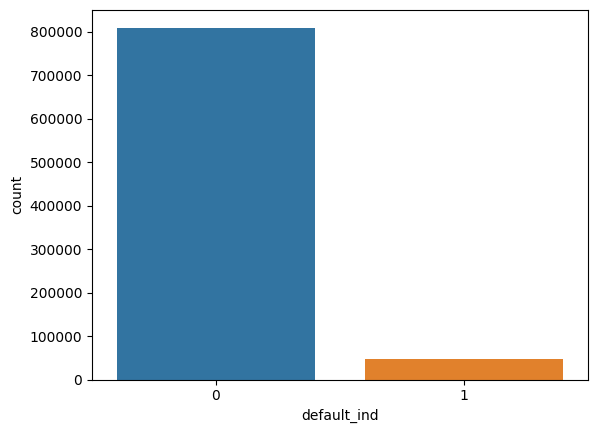

In [33]:
# Visualize default_ind attribute

sns.countplot(data=df, x='default_ind')
plt.show()

## New feature using user defined transformer

In [34]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CreditUtilizationRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, include=True):
        self.revol_bal_col = 'revol_bal'
        self.annual_inc_col = 'annual_inc'
        self.installment_col = 'installment'
        self.total_rec_prncp_col = 'total_rec_prncp'
        self.funded_amnt_col = 'funded_amnt'

        self.include_rev_to_inc_ratio = include
        self.include_loan_to_inc_ratio = include
        self.include_repayment_progress = include


    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Find index of columns
        revol_bal_ix = np.where(X.columns == self.revol_bal_col)[0][0]
        annual_inc_ix = np.where(X.columns == self.annual_inc_col)[0][0]
        installment_ix = np.where(X.columns == self.installment_col)[0][0]
        total_rec_prncp_ix = np.where(X.columns == self.total_rec_prncp_col)[0][0]
        funded_amnt_ix = np.where(X.columns == self.funded_amnt_col)[0][0]

        # Calculate the Revolving Credit Balance to Annual Income Ratio.
        rev_to_inc_ratio = X.iloc[:, revol_bal_ix] / X.iloc[:, annual_inc_ix]

        # Calculate the Loan Payment-to-Income Ratio.
        loan_to_inc_ratio = X.iloc[:, installment_ix] / (X.iloc[:, annual_inc_ix] / 12)

        # Calculate the Repayment Progress.
        repayment_progress = (X.iloc[:, total_rec_prncp_ix] / X.iloc[:, funded_amnt_ix]) * 100

        if self.include_rev_to_inc_ratio:
            # Add the calculated Revolving Credit Balance to Annual Income Ratio as a new column to the input data.
            X['Rev_to_Inc_Ratio'] = rev_to_inc_ratio

        if self.include_loan_to_inc_ratio:
            # Add the calculated Loan Payment-to-Income Ratio as a new column to the input data.
            X['Loan_Payment_to_Income_Ratio'] = loan_to_inc_ratio

        if self.include_repayment_progress:
            # Add the calculated Repayment Progress as a new column to the input data.
            X['Repayment_Progress'] = repayment_progress

        return X



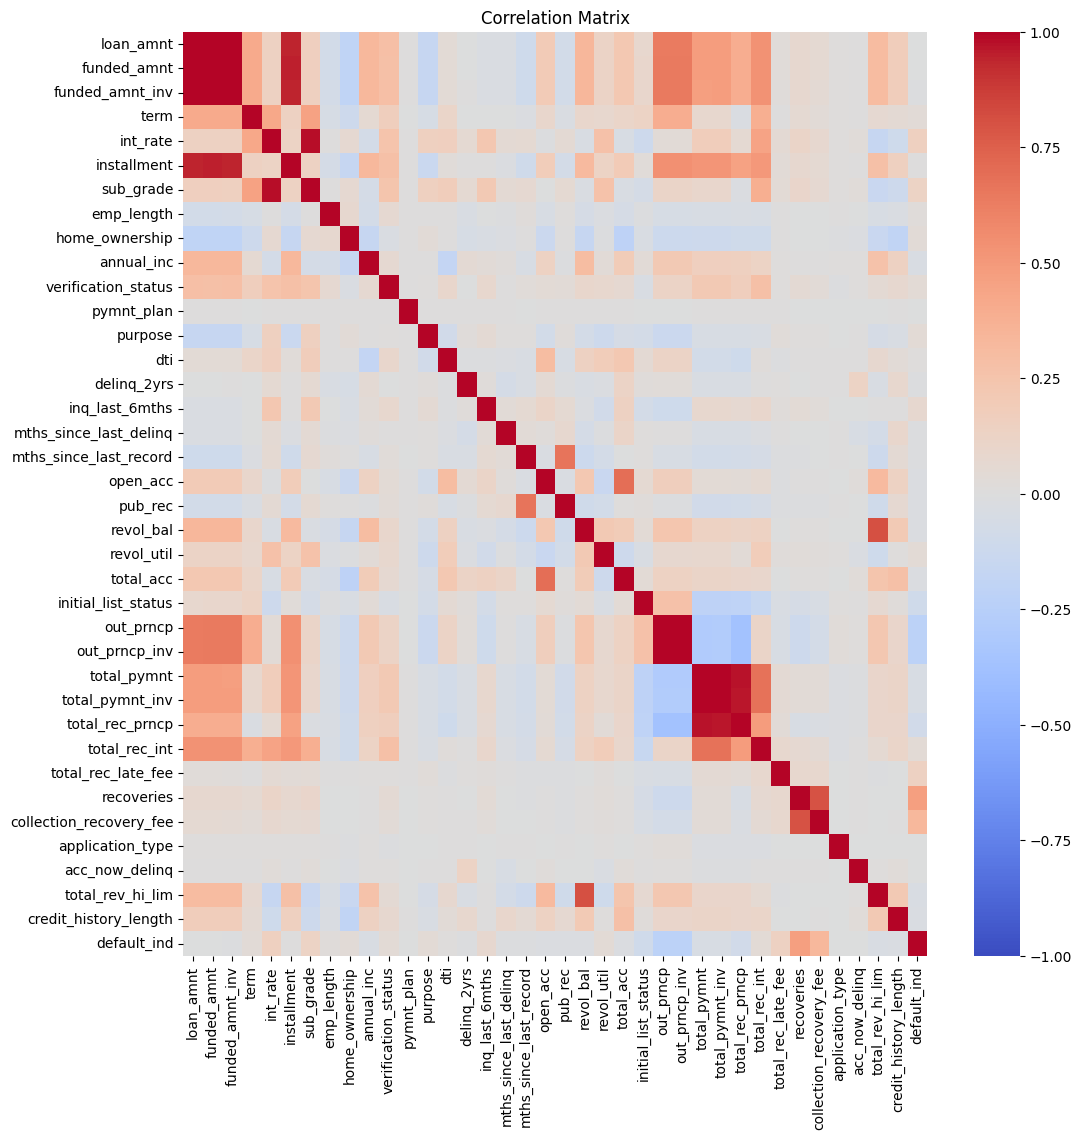

In [35]:
# Visualize - Correlation matrix

# Create a correlation matrix
corr_matrix = df.corr()

# Select the correlation values with 'default_ind'
target_corr = corr_matrix['default_ind']

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show() 

# Model selection and training

In [36]:
selected_features = [
    'collection_recovery_fee'   ,                  
    'acc_now_delinq' ,                                    
    'funded_amnt'   ,               
    'funded_amnt_inv'   ,            
    'mths_since_last_record' ,       
    'delinq_2yrs'   ,                          
    'dti'            ,              
    'mths_since_last_delinq'  ,       
    'emp_length',                      
    'pub_rec'   ,                  
    'revol_bal'    ,                                
    'credit_history_length'  ,        
    'term'   ,                       
    'home_ownership' ,                                
    'total_rev_hi_lim'  ,              
    'total_pymnt'      ,                     
    'total_pymnt_inv'  ,              
    'purpose'   ,                   
    'revol_util'   ,                 
    'total_rec_int'   ,               
    'inq_last_6mths'  ,              
    'total_rec_prncp' ,                        
    'sub_grade'        ,             
    'total_rec_late_fee'   ,          
    'int_rate'   ,                    
    'out_prncp_inv'  ,                 
    'out_prncp'   ,                       
    'recoveries'                     
]
X = df[selected_features]
y = df['default_ind']

#### StratifiedShuffleSplit Sampling

In [37]:

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Instantiate the StratifiedShuffleSplit object
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split and obtain the indices for training and testing sets
for train_index, test_index in stratified_shuffle_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [38]:

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (684772, 28)
X_test shape: (171194, 28)
y_train shape: (684772,)
y_test shape: (171194,)


# Decision Tree Model


#### Decision Tree Model with no hyperparameter

In [39]:

# Create a Decision Tree Classifier with class-weighted training
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9956248466651869


#### Define the parameter grid for Grid Search & Perform Grid Search

In [40]:
'''
param_grid = {
    # 'criterion': ['gini', 'entropy']
    # 'splitter': ['best', 'random']
    # 'max_depth': [None, 5, 10, 15, 20],
    # 'min_samples_split': [2, 5, 10]
    # 'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print ('Best splitter:',grid_search.best_params_['splitter'])
print ('Best accuracy:', grid_search.best_score_)
'''

"\nparam_grid = {\n    # 'criterion': ['gini', 'entropy']\n    # 'splitter': ['best', 'random']\n    # 'max_depth': [None, 5, 10, 15, 20],\n    # 'min_samples_split': [2, 5, 10]\n    # 'min_samples_leaf': [1, 2, 4]\n}\n\ngrid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')\ngrid_search.fit(X_train, y_train)\n\nprint ('Best splitter:',grid_search.best_params_['splitter'])\nprint ('Best accuracy:', grid_search.best_score_)\n"

#### Decision Tree Model with 5 hyperparameters

In [41]:
# Create a Decision Tree Classifier with class-weighted training
dt_classifier = DecisionTreeClassifier(criterion='entropy',splitter = 'best', max_depth = 10, min_samples_split = 10, min_samples_leaf = 4, class_weight='balanced', random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
DT_hyperparameter_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", DT_hyperparameter_accuracy)


Accuracy: 0.9973071486150216


#### Decision Tree Model with SMOTE

In [42]:
# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Perform SMOTE only on the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

#### Visualising Data Shape Before and After SMOTE

In [43]:
# Before SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

# After SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Class distribution before SMOTE:
default_ind
0    647598
1     37174
Name: count, dtype: int64
Class distribution after SMOTE:
default_ind
0    647598
1    647598
Name: count, dtype: int64


#### Training model

In [44]:
# Train the classifier on the training data with SMOTE
classifier_smote = DecisionTreeClassifier(criterion='entropy',splitter = 'best', max_depth = 10, min_samples_split = 10, min_samples_leaf = 4, class_weight='balanced', random_state=42)
classifier_smote.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

#### Show accuracy of using SMOTE on DT with 5 hyperparameters

In [45]:
# Make predictions on the test set using the trained model
y_pred_smote = classifier_smote.predict(X_test)

# Evaluate the model
DT_smote_accuracy = accuracy_score(y_test, y_pred_smote)
print("Accuracy:", DT_smote_accuracy)

Accuracy: 0.9974882297276774


#### Decision Tree Model with Class-Weighted

In [51]:
param_grid = {
    'criterion': ['entropy'],
    'splitter': ['best'],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

# Define the Decision Tree classifier and parameter grid for tuning
classifier_class_weight = DecisionTreeClassifier(criterion='entropy',splitter = 'best', max_depth = 10, min_samples_split = 10, min_samples_leaf = 4, class_weight='balanced', random_state=42)

# Calculate the class weights using compute_sample_weight
class_weights = class_weight.compute_sample_weight('balanced', y_train)

# Fine-tuning with GridSearchCV while considering class weights
grid_search = GridSearchCV(classifier_class_weight, param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train, y_train, sample_weight=class_weights)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Decision Tree classifier with the best hyperparameters and class weights
best_class = DecisionTreeClassifier(**best_params, class_weight='balanced', random_state=42)

# Train the classifier on the training data
best_class.fit(X_train, y_train)

# Make predictions on the test set
Class_y_pred = best_class.predict(X_test)

# Evaluate the model
class_accuracy = accuracy_score(y_test, Class_y_pred)
print("Accuracy:", class_accuracy)

Accuracy: 0.9973071486150216


#### Decision Tree Classifier with 5 hyperparameters using SMOTE to do post pruning

In [52]:

# Apply post-pruning by varying ccp_alpha
ccp_alphas = np.arange(0.0, 0.01, 0.001)
best_accuracy = 0.0
best_f1_score = 0.0
best_alpha = 0.0

for alpha in ccp_alphas:
    dt_pruned = DecisionTreeClassifier(**best_params, random_state=42, ccp_alpha=alpha)
    dt_pruned.fit(X_train_balanced, y_train_balanced)
    y_pred = dt_pruned.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1_score_weighted = f1_score(y_test, y_pred, average='weighted')
    
    if f1_score_weighted > best_f1_score:
        best_f1_score = f1_score_weighted
        best_accuracy = accuracy
        best_alpha = alpha

print("Best CCP Alpha:", best_alpha)
print("Best Accuracy:", best_accuracy)
print("Best Weighted F1 Score:", best_f1_score)

# The best_dt_pruned contains the Decision Tree classifier with the best ccp_alpha
best_dt_pruned = DecisionTreeClassifier(**best_params, random_state=42, ccp_alpha=best_alpha)
best_dt_pruned.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set using the pruned tree
y_pred_pruned = best_dt_pruned.predict(X_test)

# Evaluate the model
DT_post_pruning_accuracy = accuracy_score(y_test, y_pred_pruned)
print("Accuracy:", DT_post_pruning_accuracy)

# Perform evaluation or other tasks with the pruned model as needed

Best CCP Alpha: 0.001
Best Accuracy: 0.9976634695141184
Best Weighted F1 Score: 0.9976532981685309
Accuracy: 0.9976634695141184


# Evaluate the best model



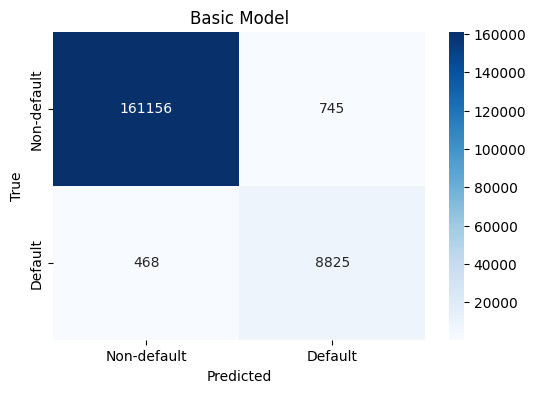

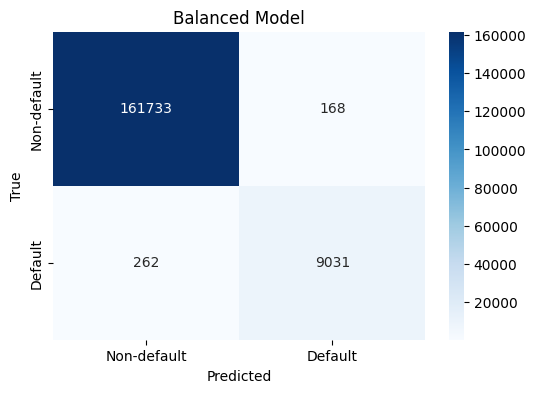

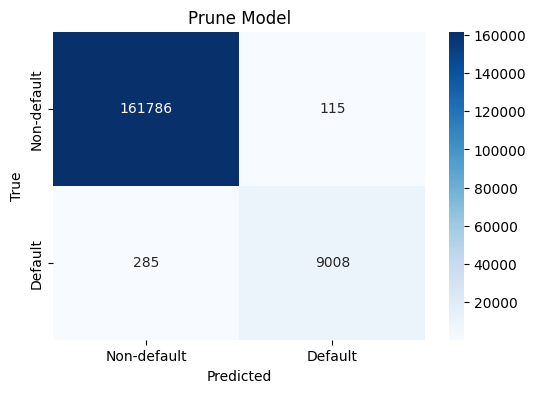

            Model  Accuracy  ROC-AUC Score  Precision (Non-default)  \
0     Basic Model  0.992914       0.972519                 0.997104   
1  Balanced Model  0.997488       0.985385                 0.998383   
2     Prune Model  0.997663       0.984311                 0.998242   

   Recall (Non-default)  F1-score (Non-default)  Precision (Default)  \
0              0.995398                0.996251             0.922153   
1              0.998962                0.998672             0.981737   
2              0.999290                0.998765             0.987394   

   Recall (Default)  F1-score (Default)  
0          0.949640            0.935694  
1          0.971807            0.976747  
2          0.969332            0.978280  


In [53]:
def evaluate_predictions(y_true, y_pred, model_name):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(model_name)
    plt.show()

    # Generate the classification report
    report = classification_report(y_true, y_pred, target_names=['Non-default', 'Default'], output_dict=True)

    # Create a summary table
    summary_table = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'ROC-AUC Score': [roc_auc],
        'Precision (Non-default)': [report['Non-default']['precision']],
        'Recall (Non-default)': [report['Non-default']['recall']],
        'F1-score (Non-default)': [report['Non-default']['f1-score']],
        'Precision (Default)': [report['Default']['precision']],
        'Recall (Default)': [report['Default']['recall']],
        'F1-score (Default)': [report['Default']['f1-score']],
    })

    return summary_table

# Usage:
basic_summary = evaluate_predictions(y_test, y_pred, "Basic Model")
smote_summary = evaluate_predictions(y_test, y_pred_smote, "Balanced Model")
class_summary = evaluate_predictions(y_test, y_pred_pruned, "Prune Model")

# Combine all summaries into one DataFrame
all_summaries = pd.concat([basic_summary, smote_summary, class_summary], ignore_index=True)

# Display the summary table
print(all_summaries)

#### Conclusion: Since Decision Tree using SMOTE doing post-pruning with the 5 hyperparameters have the best scores across almost all metrics, therefore it is best to use this approach